In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [24]:
df = pd.read_csv('./File/Cost_of_Living_Index_by_Country_2024.csv')

df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


### Index Comparison
### Comparação de Índices

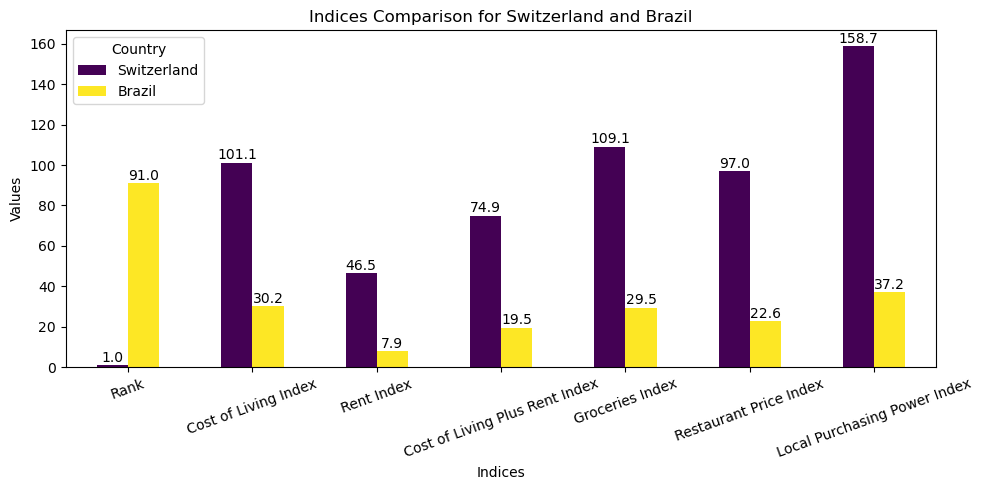

In [25]:
SwixBra = df[df['Country'].isin(['Switzerland', 'Brazil'])]
indices = [
    'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 
    'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index'
]

ax = SwixBra.set_index('Country').T.plot(kind='bar', figsize=(10, 5), colormap='viridis')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=0.3)

plt.xlabel('Indices')
plt.ylabel('Values')
plt.title('Indices Comparison for Switzerland and Brazil')
plt.xticks(rotation=20)
plt.tight_layout()

plt.show()

### Relative Differences
### Diferenças Relativas

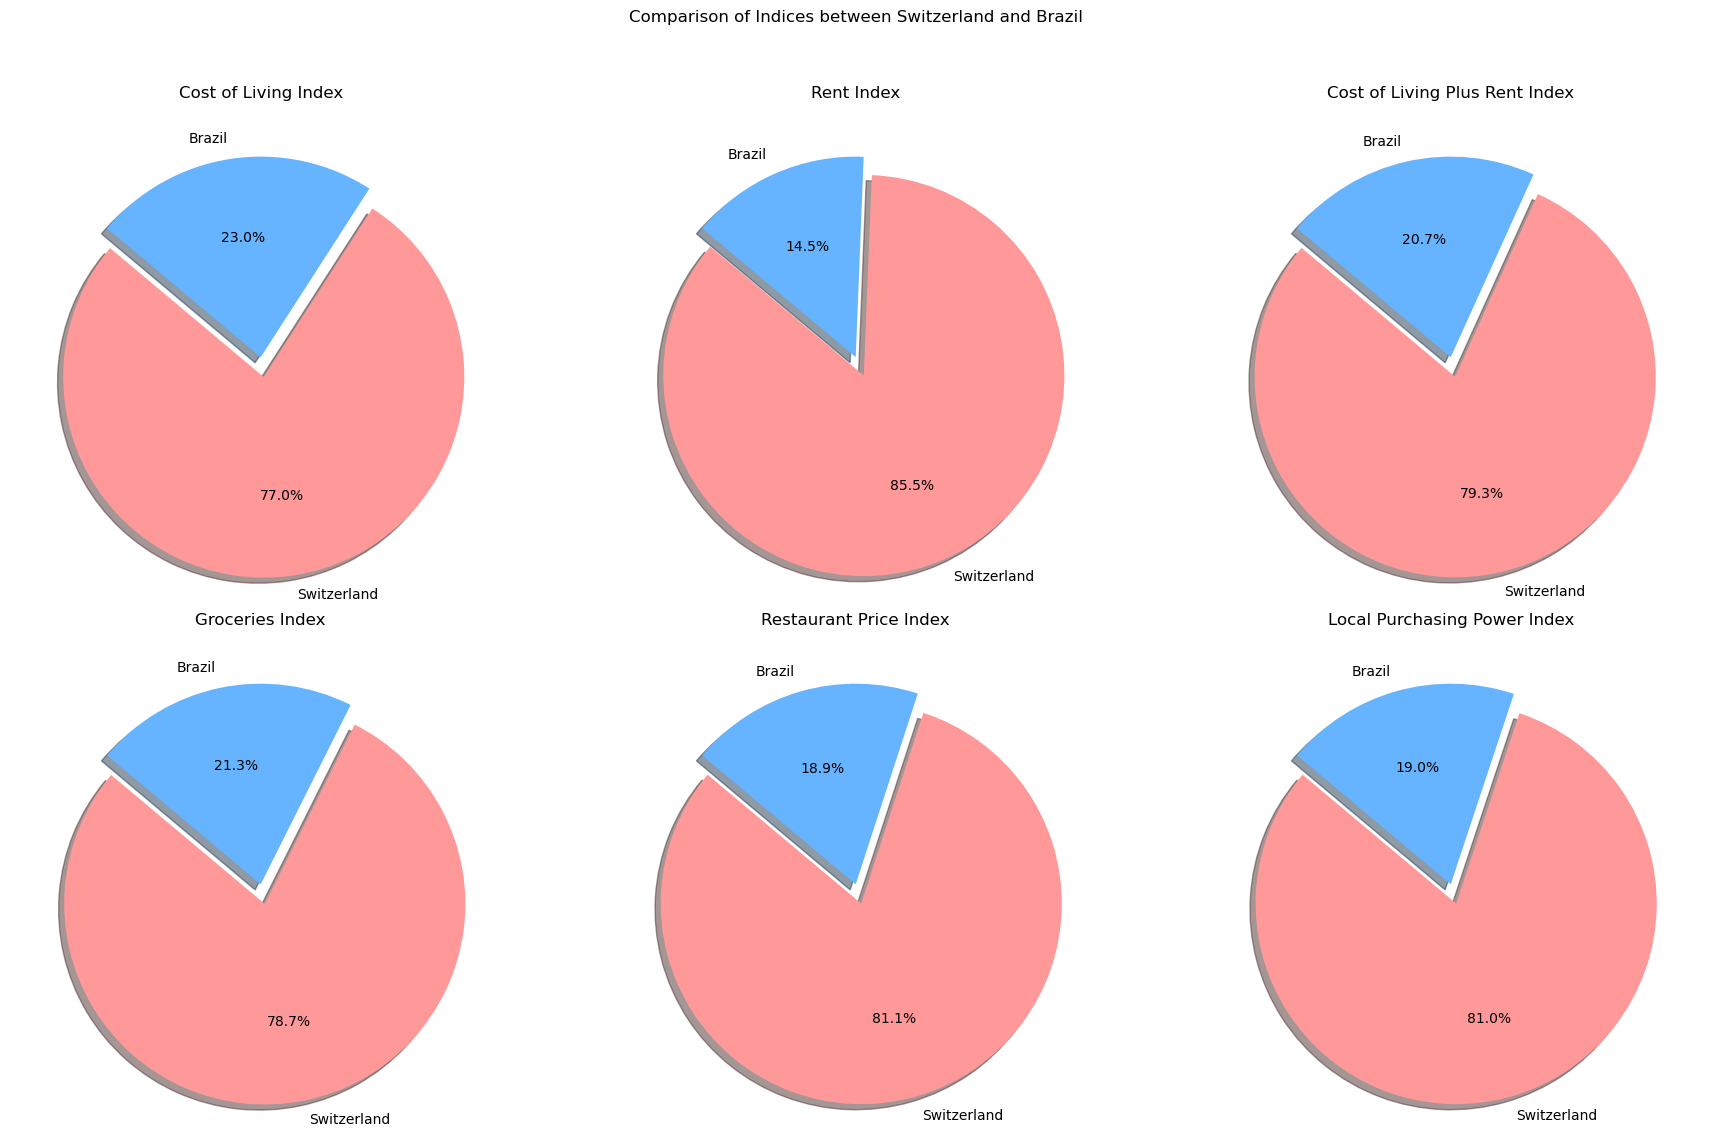

In [26]:

num_indices = len(indices)


fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Indices between Switzerland and Brazil')


axs = axs.flatten()


for i, index in enumerate(indices):
    swi_value = SwixBra[SwixBra['Country'] == 'Switzerland'][index].values[0]
    bra_value = SwixBra[SwixBra['Country'] == 'Brazil'][index].values[0]
    
    labels = ['Switzerland', 'Brazil']
    sizes = [swi_value, bra_value]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0) 

    axs[i].pie(sizes, explode=explode, labels=labels, colors=colors,
               autopct='%1.1f%%', shadow=True, startangle=140)
    axs[i].set_title(index)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [27]:
for column in SwixBra.columns[1:]:
    print(f'Comparing {column} between Switzerland and Brazil:')
    print(f'Switzerland: {SwixBra[SwixBra["Country"] == "Switzerland"][column].values[0]}')
    print(f'Brazil: {SwixBra[SwixBra["Country"] == "Brazil"][column].values[0]}')
    print()

Comparing Country between Switzerland and Brazil:
Switzerland: Switzerland
Brazil: Brazil

Comparing Cost of Living Index between Switzerland and Brazil:
Switzerland: 101.1
Brazil: 30.2

Comparing Rent Index between Switzerland and Brazil:
Switzerland: 46.5
Brazil: 7.9

Comparing Cost of Living Plus Rent Index between Switzerland and Brazil:
Switzerland: 74.9
Brazil: 19.5

Comparing Groceries Index between Switzerland and Brazil:
Switzerland: 109.1
Brazil: 29.5

Comparing Restaurant Price Index between Switzerland and Brazil:
Switzerland: 97.0
Brazil: 22.6

Comparing Local Purchasing Power Index between Switzerland and Brazil:
Switzerland: 158.7
Brazil: 37.2



In [28]:
relative_differences = pd.DataFrame(index=indices, columns=['Difference (%)'])

# calcular a diferença relativa para cada índice
for index in indices:
    # obter os valores para cada país
    swi_value = SwixBra[SwixBra['Country'] == 'Switzerland'][index].values[0]
    bra_value = SwixBra[SwixBra['Country'] == 'Brazil'][index].values[0]
    
    # calcular a diferença relativa
    if bra_value != 0:  # Evitar divisão por zero
        diff = ((swi_value - bra_value) / bra_value) * 100
        relative_differences.loc[index, 'Difference (%)'] = f'{diff:.2f}'
    else:
        relative_differences.loc[index, 'Difference (%)'] = None  # nenhuma diferença se o valor for zero

print('Relative Difference (%) between Switzerland and Brazil:')
print(relative_differences)

Relative Difference (%) between Switzerland and Brazil:
                               Difference (%)
Cost of Living Index                   234.77
Rent Index                             488.61
Cost of Living Plus Rent Index         284.10
Groceries Index                        269.83
Restaurant Price Index                 329.20
Local Purchasing Power Index           326.61
